## Getting ROC Curve

**Author**: Thodoris Petropoulos

**Label**: Evaluating Models

### Scope
The scope of this notebook is to provide instructions on how to get ROC Curve data of a specific model using the Python API.

### Background
Insights provided by the ROC Curve are helpful in evaluating the performance of machine learning models. 

The receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

### Requirements

- Python version 3.7.3
-  DataRobot API version 2.19.0. 
Small adjustments might be needed depending on the Python version and DataRobot API version you are using.

Full documentation of the Python package can be found here: https://datarobot-public-api-client.readthedocs-hosted.com

It is assumed you already have a DataRobot <code>Project</code> object and a DataRobot <code>Model</code> object.

#### Import Libraries

In [2]:
import datarobot as dr
import pandas as pd
import matplotlib.pyplot as plt

#### Requesting ROC Curve Data

ROC curve data can be generated for a specific data partition (validation, cross validation, or holdout) or for all the data partition using the <code>get_roc_curve</code> method.

To retrieve ROC curve information:

In [5]:
roc = model.get_roc_curve('validation')

#Save the result into a pandas dataframe
df = pd.DataFrame(roc.roc_points)
df.head()

,accuracy,f1_score,false_negative_score,false_positive_rate,false_positive_score,fraction_predicted_as_negative,fraction_predicted_as_positive,lift_negative,lift_positive,matthews_correlation_coefficient,negative_predictive_value,positive_predictive_value,threshold,true_negative_rate,true_negative_score,true_positive_rate,true_positive_score
0,0.603125,0.000000,635,0.0,0,1.00000,0.00000,1.000000,0.000000,0.000000,0.603125,0.0,1.000000,1.0,965,0.000000,0
1,0.604375,0.006279,633,0.0,0,0.99875,0.00125,1.001252,2.519685,0.043612,0.603880,1.0,0.978897,1.0,965,0.003150,2
2,0.605625,0.012520,631,0.0,0,0.99750,0.00250,1.002506,2.519685,0.061715,0.604637,1.0,0.922599,1.0,965,0.006299,4
3,0.606875,0.018721,629,0.0,0,0.99625,0.00375,1.003764,2.519685,0.075632,0.605395,1.0,0.896016,1.0,965,0.009449,6
4,0.611875,0.043143,621,0.0,0,0.99125,0.00875,1.008827,2.519685,0.115822,0.608449,1.0,0.837898,1.0,965,0.022047,14


#### Plotting ROC Curve

(0, 1)

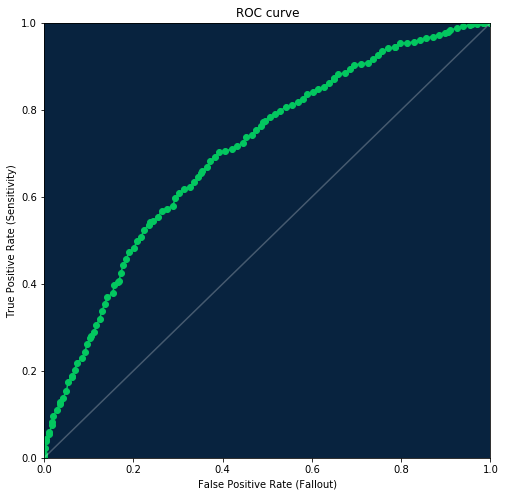

In [7]:
dr_roc_green = '#03c75f'
white = '#ffffff'
dr_purple = '#65147D'
dr_dense_green = '#018f4f'
dr_dark_blue = '#08233F'

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

plt.scatter(df.false_positive_rate, df.true_positive_rate, color=dr_roc_green)
plt.plot(df.false_positive_rate, df.true_positive_rate, color=dr_roc_green)
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (Fallout)')
plt.xlim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.ylim([0, 1])

#### Threshold Operations

You can get the recommended threshold value with maximal F1 score. That is the same threshold that is preselected in DataRobot when you open the “ROC curve” tab.

In [8]:
threshold = roc.get_best_f1_threshold()
threshold

0.3293589583674943

You can also estimate metrics for different threshold values. This will produce the same results as updating the threshold on the DataRobot “ROC curve” tab.

In [9]:
metrics = roc.estimate_threshold(threshold)
metrics

{'accuracy': 0.609375,
 'f1_score': 0.6144355336212215,
 'false_negative_score': 137,
 'true_negative_score': 477,
 'true_positive_score': 498,
 'false_positive_score': 488,
 'true_negative_rate': 0.49430051813471504,
 'false_positive_rate': 0.505699481865285,
 'true_positive_rate': 0.784251968503937,
 'matthews_correlation_coefficient': 0.28024309200601993,
 'positive_predictive_value': 0.5050709939148073,
 'negative_predictive_value': 0.7768729641693811,
 'threshold': 0.3293589583674943,
 'fraction_predicted_as_positive': 0.61625,
 'fraction_predicted_as_negative': 0.38375000000000004,
 'lift_positive': 1.272619827186916,
 'lift_negative': 1.288079526083948}